## A1. Dataset and Setup

### Import required libraries

In [13]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

### Load dataset

In [14]:
digits = load_digits()
print(digits.data.shape)

(1797, 64)


### Data splitting

In [15]:
X, y = digits['data'], digits['target']

# split into train (70%) and temp (30%)
sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, temp_index in sss1.split(X, y):
    X_train, X_temp = X[train_index], X[temp_index]
    y_train, y_temp = y[train_index], y[temp_index]

# split temp into validation (50% of temp) and test (50% of temp)
sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for val_index, test_index in sss2.split(X_temp, y_temp):
    X_validation, X_test = X_temp[val_index], X_temp[test_index]
    y_validation, y_test = y_temp[val_index], y_temp[test_index]

#### Check shapes

In [ ]:
print("Train:", X_train.shape, "Validation:", X_validation.shape, "Test:", X_test.shape)

Train: (1257, 64) Validation: (270, 64) Test: (270, 64)


####  Check class distribution

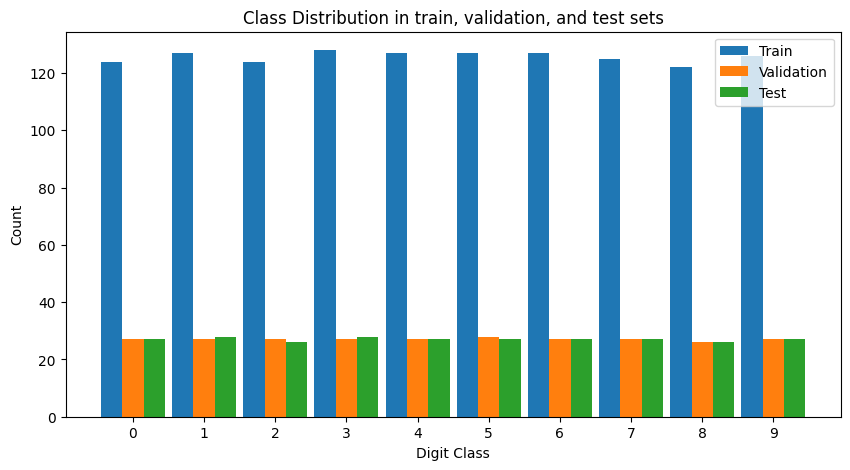

In [19]:
# Count labels
train_counts = np.bincount(y_train)
val_counts = np.bincount(y_validation)
test_counts = np.bincount(y_test)
labels = np.arange(len(train_counts))   # digits 0–9
# Create bar width & positions
width = 0.3
x = np.arange(len(labels))
plt.figure(figsize=(10,5))
plt.bar(x - width, train_counts, width, label="Train")
plt.bar(x,         val_counts,  width, label="Validation")
plt.bar(x + width, test_counts, width, label="Test")

plt.xlabel("Digit Class")
plt.ylabel("Count")
plt.title("Class Distribution in train, validation, and test sets")
plt.xticks(labels)
plt.legend()
plt.show()

#### Data standardization 

In [18]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)

sc.fit(X_validation)
X_validation = sc.transform(X_validation)

sc.fit(X_test)
X_test = sc.transform(X_test)